In [91]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [92]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(10)

C:\Users\thuyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


DATA trước khi xóa outlier

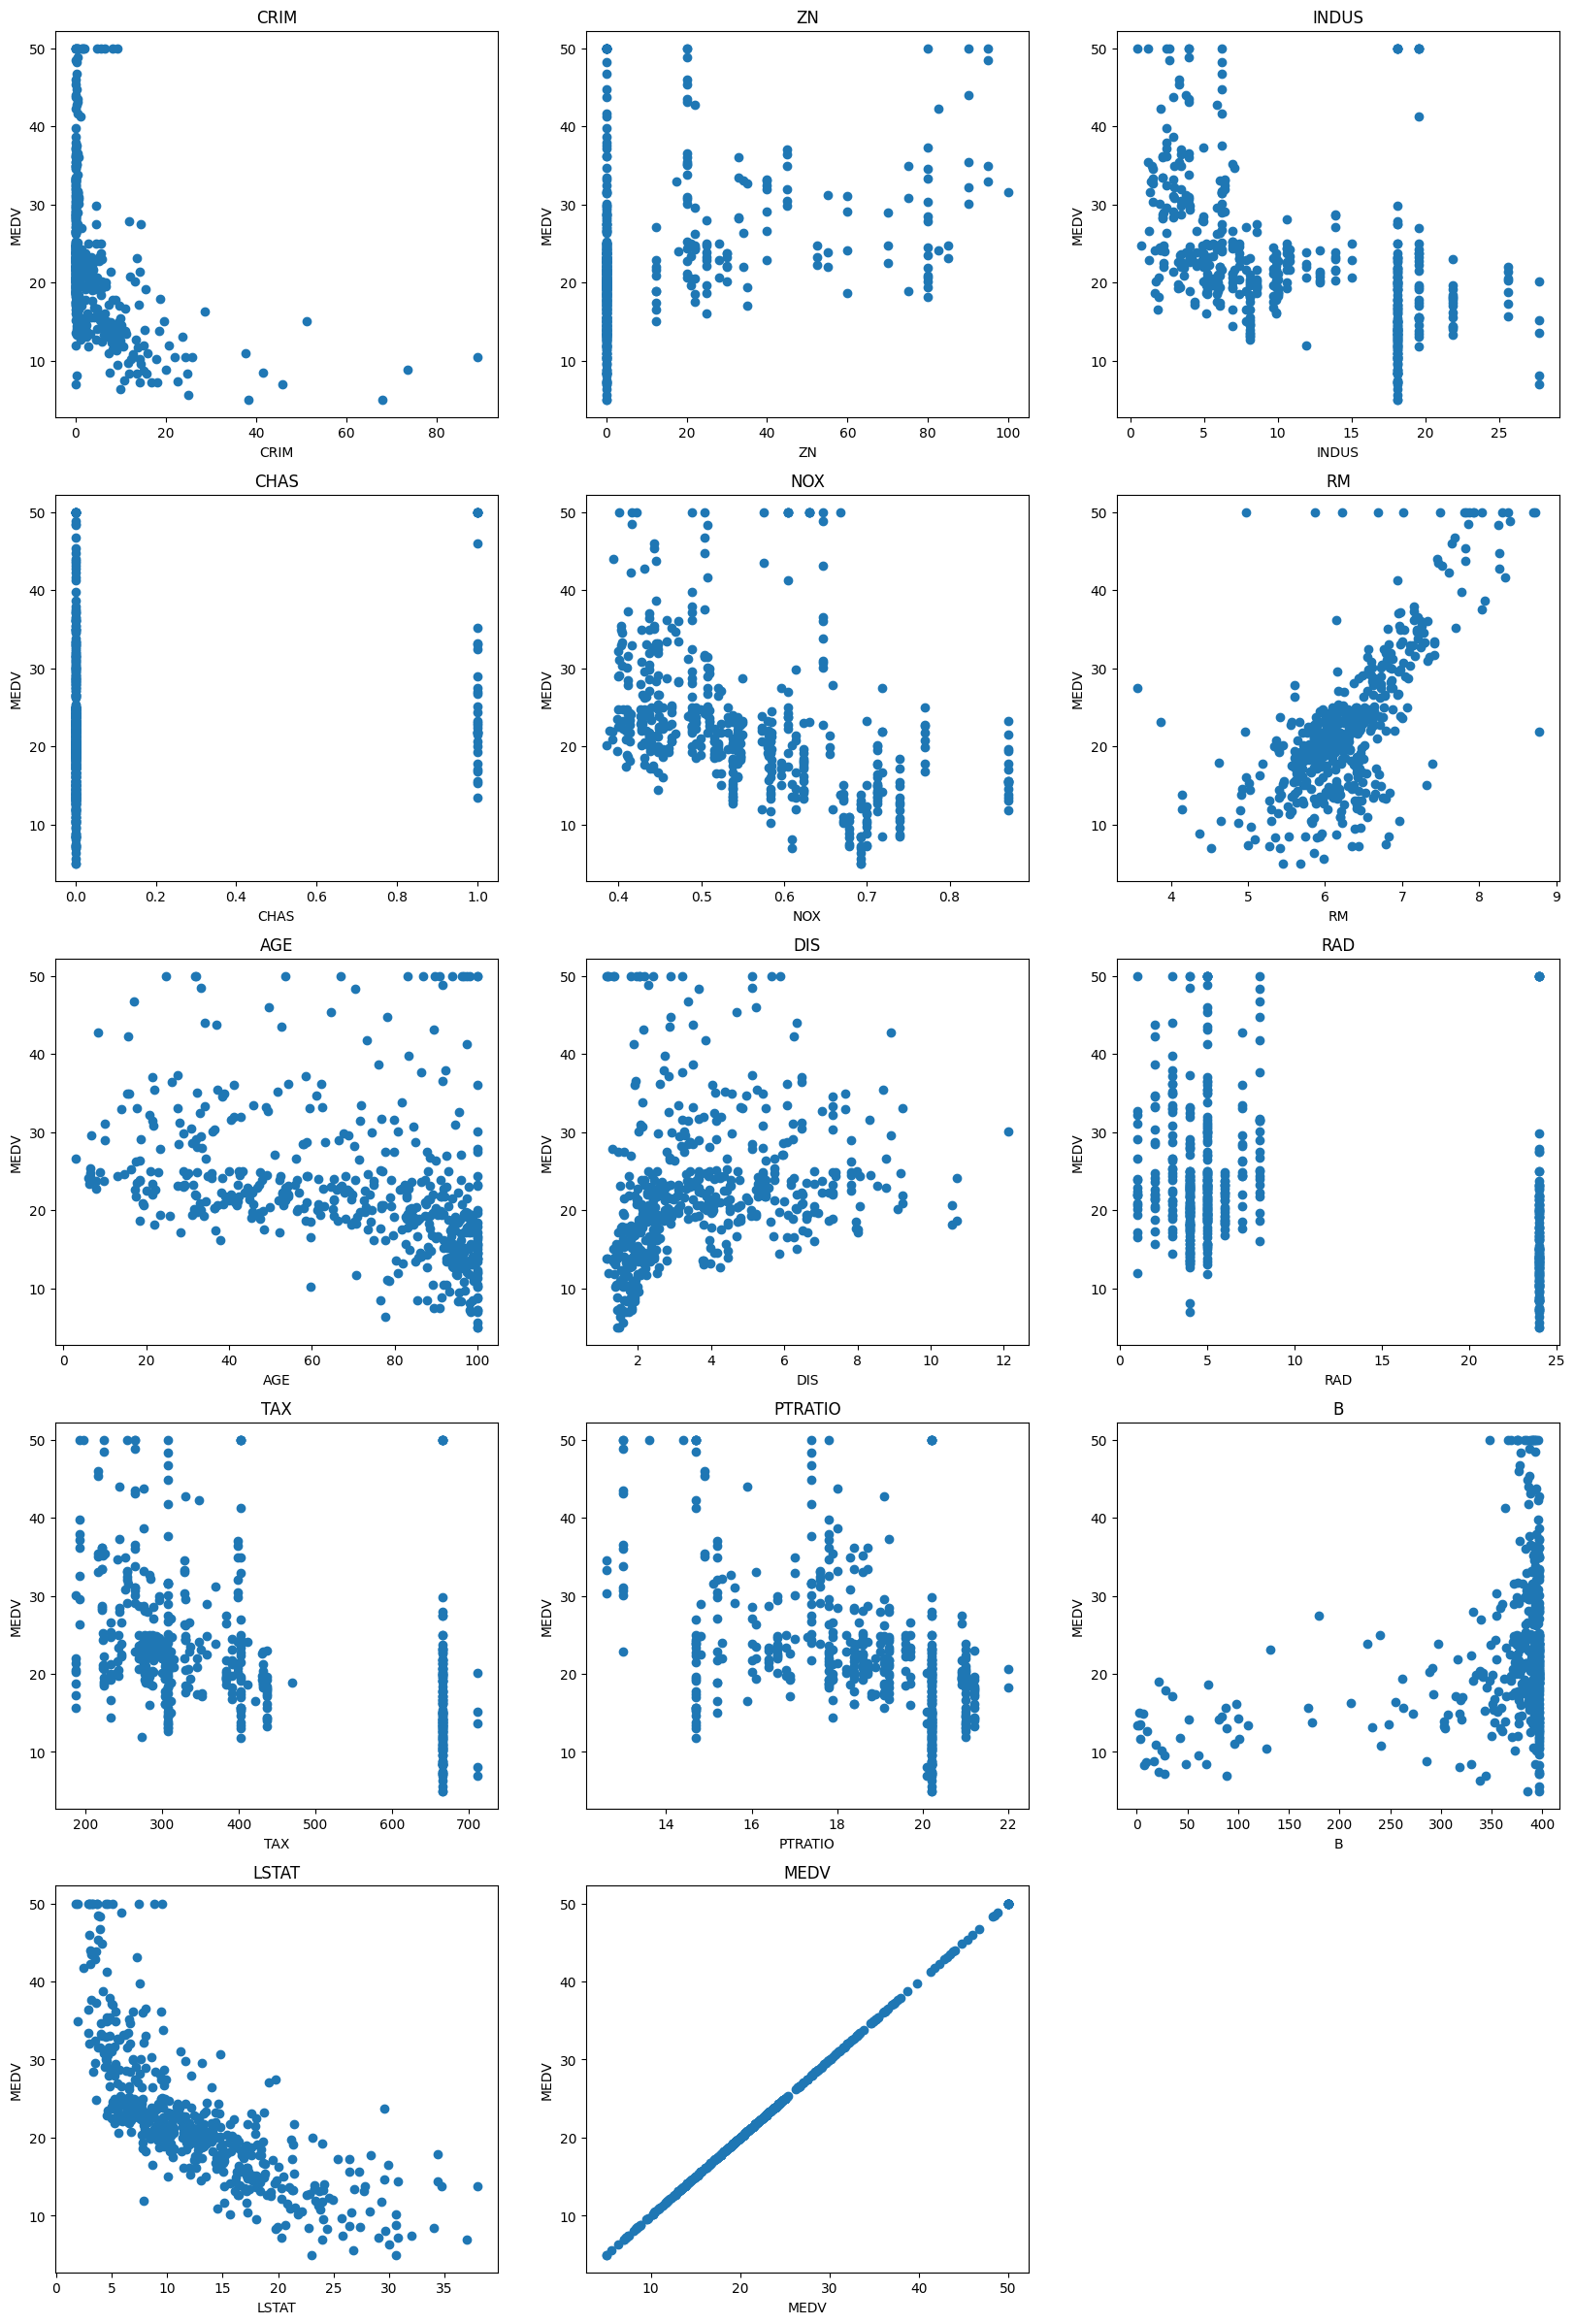

In [93]:
plt.figure(figsize=(20, 30))

for i, attribute in enumerate(df.columns):
    plt.subplot(5, 3, i + 1)
    column = df[attribute]
    plt.plot(column, df['MEDV'], 'o')
    plt.title(attribute)
    plt.xlabel(attribute)
    plt.ylabel('MEDV')

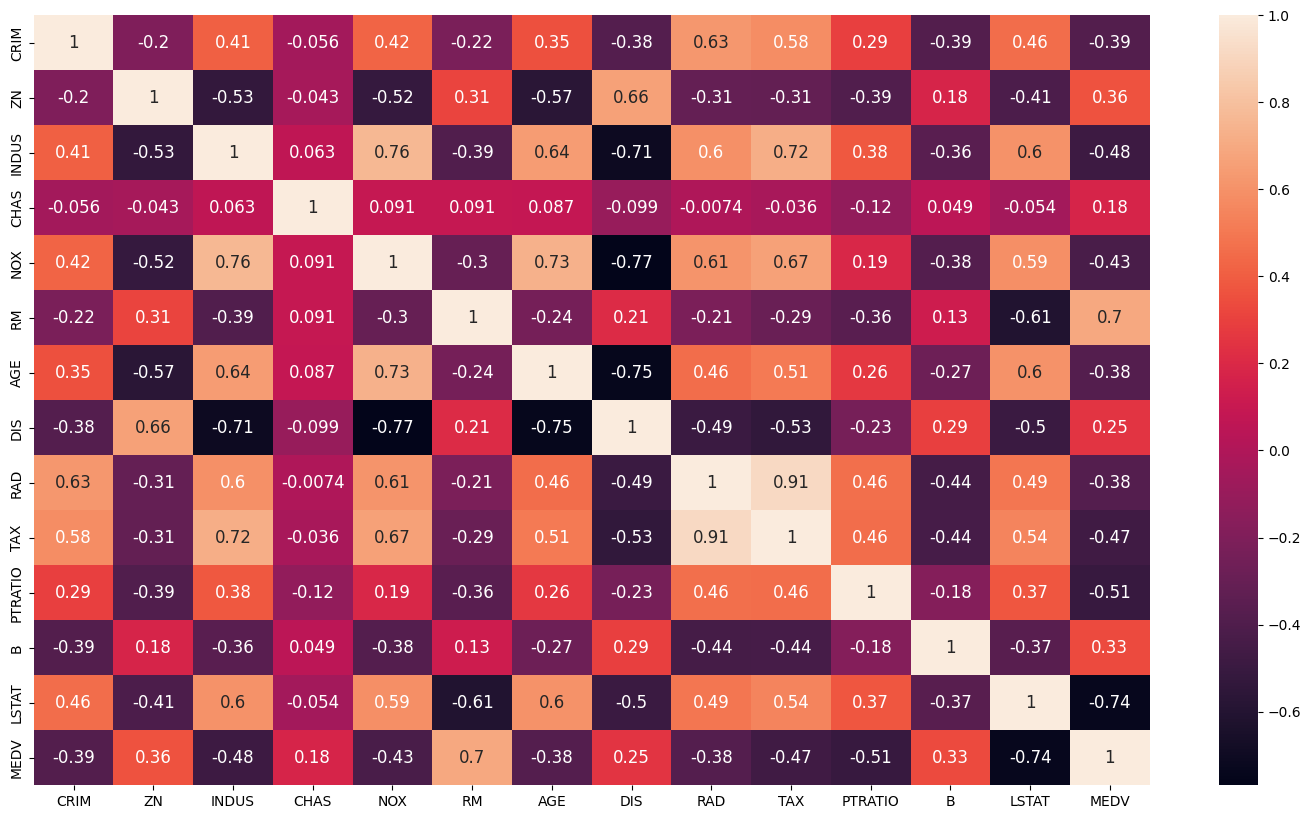

In [94]:
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df.corr(), ax=ax, annot=True, annot_kws={'size': 12})
plt.show()

Xóa outlier.

In [95]:
df = df.drop(df[df['MEDV'] == df['MEDV'].max()].index.tolist())
df = df.drop(df[df["RM"] < 4].index.tolist())
df = df.drop(df[df["RM"] > 8.4].index.tolist())

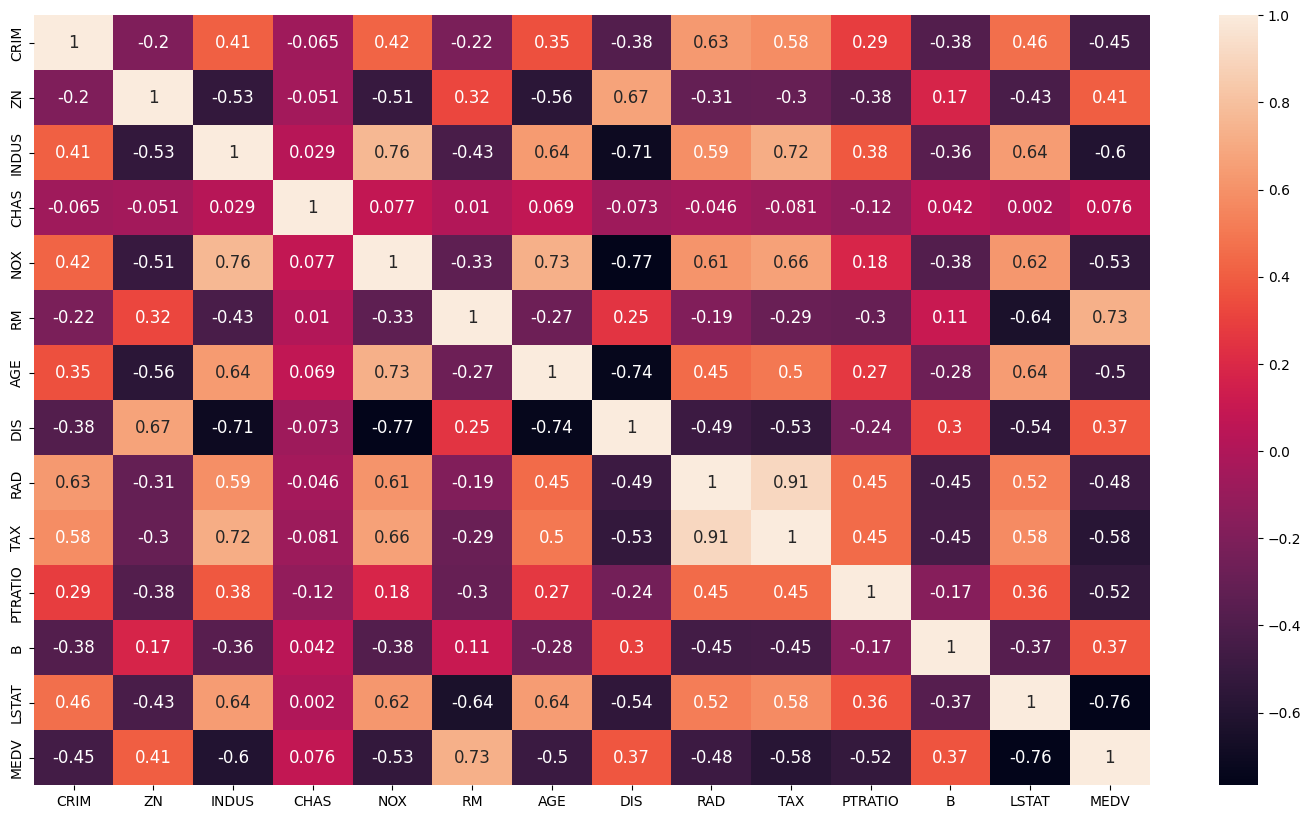

In [96]:
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df.corr(), ax=ax, annot=True, annot_kws={'size': 12})
plt.show()

Data sau khi xóa outlier.

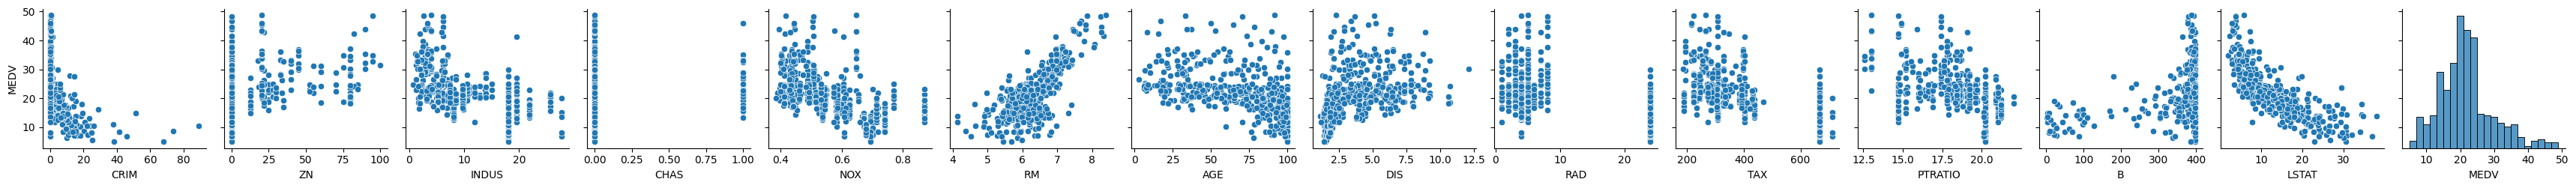

In [97]:
sn.pairplot(df, x_vars=df.columns, y_vars="MEDV")

In [98]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)  # this is to make the dataset consistent
classifier_pipeline = make_pipeline(MinMaxScaler(), Ridge(alpha=0.01, tol=1e-5, max_iter=2000))

In [99]:
sfs1 = SFS(classifier_pipeline,
           k_features=1,
           forward=False,
           scoring='r2',
           cv=cv)
scaler = MinMaxScaler()
X = df.drop(columns=['MEDV', 'CHAS'])
features = X.columns
X_data = scaler.fit_transform(X)
X = pd.DataFrame(X_data, columns=features)
y = df.MEDV
sfs1.fit(X, y)

sfs1.subsets_

{12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.81831259, 0.7819195 , 0.78943076, 0.79881454, 0.71146972]),
  'avg_score': 0.7799894229197383,
  'feature_names': ('CRIM',
   'ZN',
   'INDUS',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT')},
 11: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.81853518, 0.78299753, 0.79087505, 0.79907946, 0.7110473 ]),
  'avg_score': 0.780506903113181,
  'feature_names': ('CRIM',
   'ZN',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT')},
 10: {'feature_idx': (0, 1, 3, 4, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.80235839, 0.78689653, 0.78722808, 0.78904364, 0.73124008]),
  'avg_score': 0.7793533424341195,
  'feature_names': ('CRIM',
   'ZN',
   'NOX',
   'RM',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT')},
 9: {'feature_idx': (0, 3, 4, 6, 7, 8, 9, 10, 11),
  'cv_scores': array(

Chọn bộ attr bên đưới bởi vì điểm của nó là 0.79xxx gần với cái to nhất là 0.80xx mà lại còn bớt được 1 attr

In [100]:
df_2 = df[['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', "MEDV"]]


In [101]:
df_2.corr()

,CRIM,ZN,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198263,0.421144,-0.220544,-0.381220,0.629506,0.584905,0.286023,-0.381640,0.463252,-0.451583
ZN,-0.198263,1.000000,-0.511344,0.322129,0.672835,-0.305574,-0.300701,-0.380447,0.174848,-0.425043,0.406117
NOX,0.421144,-0.511344,1.000000,-0.334280,-0.766889,0.608236,0.664259,0.183895,-0.383751,0.621803,-0.529655
RM,-0.220544,0.322129,-0.334280,1.000000,0.248489,-0.193221,-0.285220,-0.301827,0.106777,-0.639802,0.729039
DIS,-0.381220,0.672835,-0.766889,0.248489,1.000000,-0.487117,-0.527890,-0.243011,0.296633,-0.542955,0.372350
RAD,0.629506,-0.305574,0.608236,-0.193221,-0.487117,1.000000,0.907590,0.452621,-0.449696,0.521972,-0.484065
TAX,0.584905,-0.300701,0.664259,-0.285220,-0.527890,0.907590,1.000000,0.448858,-0.446407,0.577576,-0.580075
PTRATIO,0.286023,-0.380447,0.183895,-0.301827,-0.243011,0.452621,0.448858,1.000000,-0.170989,0.362429,-0.521559
B,-0.381640,0.174848,-0.383751,0.106777,0.296633,-0.449696,-0.446407,-0.170989,1.000000,-0.366786,0.368325
LSTAT,0.463252,-0.425043,0.621803,-0.639802,-0.542955,0.521972,0.577576,0.362429,-0.366786,1.000000,-0.760424


RM và LSTAT ảnh hưởng mạnh đến nhau và cùng ảnh hưởng mạnh tới MEDV nên thêm RM*LSTAT vào sẽ làm thay đổi đáng kể kết quả cuối cùng. RAD và TAX cũng có ảnh hưởng nhất định tới MEDV và có correlation cực lớn với nhau (0.9) nên -> xóa RAD đi(vì tax có correlation cao hơn TAX khi so với MEDV). (thử thay đổi khá nhiều thứ rồi nhưng chỉ có 2 loại thay đổi này làm cho kết quả biến động mạnh)

In [102]:
df_2["RM*LSTAT"] = df_2["RM"] * df_2["LSTAT"]

C:\Users\thuyb\AppData\Local\Temp\ipykernel_7500\3431342828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["RM*LSTAT"] = df_2["RM"] * df_2["LSTAT"]


In [103]:
df_2 = df_2.drop(columns=['RAD'])
df_2['CHAS'] = df['CHAS']

Thêm lại CHAS vào data frame

In [104]:
df_2.to_csv("processed_original.csv", index=False)